In [1]:
#Real one

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preparation

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mixed.csv.txt",sep=",")

In [4]:
df.head(3)

,EvNo,trumu,chargesg,px,py,pz,E,muchhits,stshits,trdhits,tofhits,chisqmuch,chisqsts,chisqtrd,chisqvertex,tofmass
0,1,1,-1,0.853275,-0.847333,7.35208,7.45053,11,8,3,1,1.97966,3.15940,9.20906,2.96263,0.031319
1,2,0,1,-0.431410,-0.554361,4.25411,4.31301,9,8,3,0,3.89112,1.51397,22.56260,1.23243,-1000.000000
2,2,1,-1,0.217476,0.837259,5.95573,6.01915,11,7,4,1,1.61583,2.68982,1.63692,2.96849,-0.057862


In [5]:
X=df[["muchhits","trdhits","chisqmuch"]]
y=df['trumu']

In [6]:
X=X[0:30000]
y=y[0:30000]
scaling = MinMaxScaler()
X_scaled=scaling.fit_transform(X)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.50,random_state=32)

In [8]:
X_train.shape

(15000, 3)

In [9]:
y_train.value_counts()

0    8704
1    6296
Name: trumu, dtype: int64

In [10]:
y_test.value_counts()

0    8597
1    6403
Name: trumu, dtype: int64

# Using framework

In [11]:
import tensorflow as tf
from tensorflow import keras

In [12]:
model = keras.Sequential()

model.add(keras.layers.Dense(units=2,activation="relu",input_dim=3))
model.add(keras.layers.Dense(units=1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [14]:
model_history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
469/469 [==============================] - 5s 6ms/step - loss: 0.6191 - accuracy: 0.5835 - val_loss: 0.5799 - val_accuracy: 0.7780
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.5252 - accuracy: 0.8079 - val_loss: 0.4844 - val_accuracy: 0.8310
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4384 - accuracy: 0.8704 - val_loss: 0.4113 - val_accuracy: 0.8817
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3813 - accuracy: 0.8843 - val_loss: 0.3681 - val_accuracy: 0.8817
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3464 - accuracy: 0.8842 - val_loss: 0.3395 - val_accuracy: 0.8817
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3248 - accuracy: 0.8842 - val_loss: 0.3225 - val_accuracy: 0.8819
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3120 - accuracy: 0.8881 - val_loss: 0.3121 - val_accuracy: 0.8872

Text(0.5, 0, 'Epoch number')

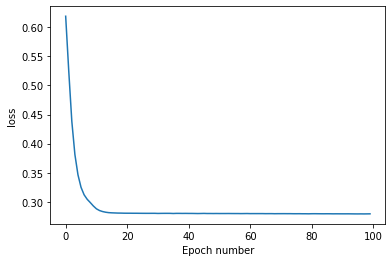

In [15]:
loss=model_history.history['loss']
index=np.arange(100)
sns.lineplot(x=index,y=loss)
plt.ylabel('loss')
plt.xlabel('Epoch number')

In [16]:
predictions=model.predict(X_test)

In [17]:
predictions=[]
predictions_sigmoid = model.predict(X_test)
for i in predictions_sigmoid:
  if i>0.5:
    predictions.append(1)
  else:
    predictions.append(0)

In [18]:
cf=confusion_matrix(y_test,predictions)

Text(33.0, 0.5, 'Actual')

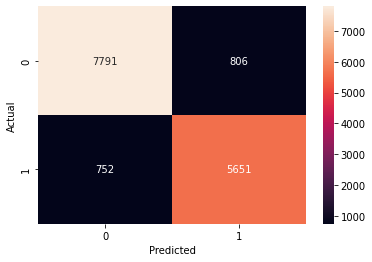

In [19]:
sns.heatmap(data=cf,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      8597
           1       0.88      0.88      0.88      6403

    accuracy                           0.90     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.90      0.90      0.90     15000



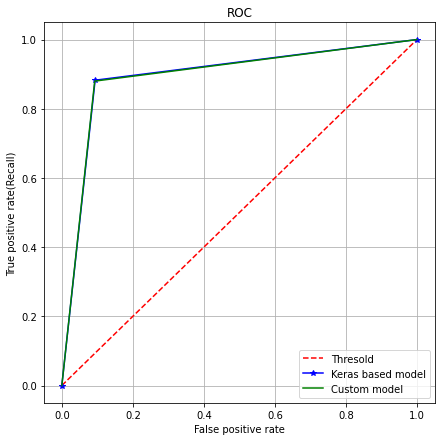

In [28]:
from sklearn.metrics import roc_curve
fpr2, tpr2, thresholds2=roc_curve(y_test,predictions)
fpr=[0.,0.09259044,1.] # custom ANN results
tpr =[0.,0.87990005,1.] 
plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], '--',color='red',label='Thresold')
plt.plot(fpr2, tpr2,color='blue',label='Keras based model',marker="*")
plt.plot(fpr, tpr,color='green',label='Custom model')
plt.ylabel('True positive rate(Recall)')
plt.xlabel('False positive rate')
plt.title('ROC')
plt.grid()
plt.legend()
plt.show()